In [2]:
import time
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')

In [3]:
title_list, content_list, score_list = [], [], []
url = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver')
driver.get(url)
time.sleep(2)
for _ in range(39):
    driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()
    time.sleep(4)

divs = driver.find_elements(By.CLASS_NAME, 'lister-item.mode-detail.imdb-user-review')
div = divs[0]
for div in divs:
    try:
        star = div.find_element(By.CLASS_NAME, 'rating-other-user-rating').text.split('/')[0]
        score_list.append(float(star))
    except:
        score_list.append(np.nan)

    title = div.find_element(By.CLASS_NAME, 'title').text
    content = div.find_element(By.CLASS_NAME, 'text.show-more__control').text
    title_list.append(title)
    content_list.append(content)


In [4]:
len(title_list), len(content_list), len(score_list)

(997, 997, 997)

In [5]:
review_list= pd.DataFrame({'score':score_list, 'title':title_list, 'content':content_list})
review_list

,score,title,content
0,10.0,Some birds aren't meant to be caged.,
1,10.0,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...
2,10.0,Don't Rent Shawshank.,I'm trying to save you money; this is the last...
3,10.0,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...
4,10.0,A classic piece of unforgettable film-making.,
...,...,...,...
992,9.0,The Shawshank Redemption,This is a classic about hope. Hope is not in p...
993,9.0,Resilience prevails.,"Off the hop, I don't mean to upset people with..."
994,8.0,Analyzing 10 points,Let me analyze why people keep giving 10 point...
995,NaN,The Reason I don't pay attention to the Oscars,This movie is one of the greatest I have ever ...


In [6]:
reviews = ''
for i in review_list.index:
    reviews += review_list.title[i] + '\n' + review_list.content[i] + '\n'

In [7]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [15]:
sw_wc = STOPWORDS

In [12]:
drop_list = ['movie', 'film', 'Shawshank', 'Shawshank Redemption', 'Redemption',
             'character', 'story', 'movies', 'watch', 'Tim Robbin', 'Andy',
             'Morgan Freeman', 'one', 'time', 'great', 'good', 'characters',
             'Freeman', 'best', 'prison']
for i in drop_list:
    sw_wc.add(i)

In [13]:
wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=sw_wc
    ).generate(reviews)

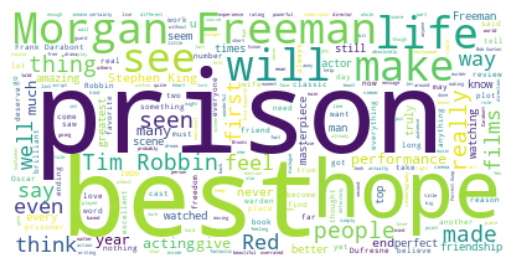

In [14]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');